# Stærðfræði og reiknifræði – Tímadæmi 7

In [2]:
#BYRJA -- Keyrið til að frumstilla.
import numpy as np, numpy.random as npr, numpy.linalg as la
import scipy.stats as stat, statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)
%matplotlib inline
# disp(x,y...) skrifar x,y... með 3 aukastöfum
def disp(*args): print(*(f'{a:.3f}' if isinstance(a,float) else a for a in args))
np.set_printoptions(precision=3, floatmode='fixed', suppress=True)

Í þessum tímadæmum rifjum við upp umfjöllun úr síðasta fyrirlestri og höldum áfram með hana, en þá voru 2. og 3. kafli kennslubókar á dagskrá. Hér eru nokkrar skilgreiningar úr bókinni, sem við skerpum á með því að reikna æfingadæmi í Python:

### T7.1 Línuleg föll og línuföll
Fall nefnist **línulegt** (*linear*) ef hægt er að skrifa það 

$$f(x) = a_1 x_1 + \ldots + a_n x_n$$

fyrir einhverja stuðla $a_1,..., a_n$ og það kallast **línufall** (*affine*) ef það er fasti $+$ línufall, sem sé 

$$g(x) = b + a_1 x_1 + \ldots + a_n x_n$$

Línuleg föll uppfylla 

$$f(\alpha x + \beta y) = \alpha f(x) + \beta f(y)$$

Skrifið línulega fallið $f(x) = 5x_1 + 2x_2$ í Python, látið $x=(1,2)$ og $y=(2,1)$ og reiknið $f(2x + 3y)$ og $2f(x)+3f(y)$

In [3]:
#7.1
def f(x):
    return 5*x[0] + 2*x[1]
    
x = np.array([1,2])
y = np.array([2,1])
result = f(2*x+3*y)
print(result)
bla = 2*f(x) + 3*f(y)
print(bla)

54
54


### T7.2 Taylor-nálgun
Taylor nálgun (*Taylor approximation*) við $f(x)$ í punkti $a$ má rita

$$\hat{f}(x) = f(a) + \nabla f(a)^T(x - a)$$

Stundum (t.d. í kennslubók) er $z$ í stað $a$, stundum $x_0$ og ef fallið er tvívítt má hafa $(x,y)$ í stað $x$ og $(x_0, y_0)$ í stað $a$.

Ákvarðið Taylor-nálgun $f(x)=x_0^2 + 2x_0^\vphantom{1}x_1^2 - x_1^3$ í punktinum $a = (1,2)$ og forritið hana í Python (munið eftir @ til að reikna innfeldi). Reiknið $f(1.2, 1.9)$ og $\hat{f}(1.2, 1.9)$.

In [4]:
#7.2
a = np.array([1,2])
def f(x):
    return x[0]**2 + 2*x[0]*x[1]**2 - x[1]**3

def grad(x):
    g = np.array([
        2*x[0] + 2*x[1]**2,
        4*x[0]*x[1] - 3*x[1]**2
    ])
    return g

def fhat(x):
    fh = f(a) + grad(a) @ (x - a)
    return fh

disp(f(x))
disp(fhat(x))

1
1


### T7.3 Norm
Lengd eða norm vigurs er 

$$\| x \| = \sqrt{x_1^2 + x_2^2 + \ldots + x_n^2}$$. 

(Evklíðsk) fjarlægð milli tveggja punkta, $a$ og $b$ er gefin með $\|a - b\|$. Í Python má reikna $\| x \|$ með `la.norm(x)` (þar sem `numpy.linalg` er flutt inn sem `la`)

Reiknið fjarlægðina milli $(1,2,3)$ og $(4,6,15)$ með Python.

In [5]:
#7.3
a = np.array([1,2,3])
b = np.array([4,6,15])
na = la.norm(a)
nb = la.norm(b)
print(nb - na)

12.901659590319298


### T 7.4 Meðaltal og staðalfrávik
**Meðaltal** (*average*, *mean*) vigurs $x$, táknað með $\overline{x}$ eða $\text{mean}(x)$, eða eins og í kennslubók með $\text{avg}(x)$, er gefið með:

$$\overline{x} = \frac{1}{n} \sum_{i=1}^n x_i$$

**Staðalfrávik** vigurs (*standard deviation*) $x$ er stundum táknað með $\text{std}(x)$. Í kennslubókinni er notuð óleiðrétta (*óbjagaða*, *uncorrected*, *unbiased*) formúlan:

$$\text{std}(x) = \sqrt{\frac{1}{n}\sum_{i=1}^n (x - \overline{x})^2}$$

Í Python má reikna staðalfrávik x með `np.std(x)`. Stundum, sérstaklega þegar reiknað er staðalfrávik úrtaks í tölfræði, er notuð *leiðrétt* (*bjöguð*, *corrected*, *biased*) formúla fyrir staðalfrávikið nefnilega:

$$\text{std}(x) = \sqrt{\frac{1}{n-1}\sum_{i=1}^n (x - \overline{x})^2}$$

**a)** Lesið inn upplýsingar um körfuboltamennina (úr skránni `karfa.txt`).<br>
**b)** Reiknið meðaltal og staðalfrávik þyngdar þeirra og sömuleiðis hæðar þeirra.

In [6]:
#7.4
a, h, w = np.loadtxt("karfa.txt").T
print(f'Meðtaltal þyngdar: {np.mean(w):.2f}')
print(f'Staðalfrávik þyngdar: {np.std(w):.2f}')
print(f'Meðtaltal hæðar : {np.mean(h):.2f}')
print(f'Staðalfrávik hæðar: {np.std(h):.2f}')

Meðtaltal þyngdar: 91.47
Staðalfrávik þyngdar: 9.49
Meðtaltal hæðar : 187.20
Staðalfrávik hæðar: 6.88


### T7.5 Dreifni

Eitt hugtak sem kemur oft við sögu í tölfræði og línulegri algebru þótt það sé ekki nefnt í bókinni er *dreifni* (*variance*). Dreifni vigurs er staðalfrávik hans í öðru veldi, sem sé:

$$\text{var}(x) = \frac{1}{n}\sum_{i=1}^n (x - \overline{x})^2$$

Í Python gefur `np.var(x)` dreifni x. Reiknið dreifni hæðar körfuboltamannanna og in sannreynið staðalfrávikið sé kvaðratrótin af dreifninni.

In [7]:
#7.5
hvar = np.var(h)
stdh = np.std(h)
print(f'Staðalfrávik hæðar: {stdh:.2f}')
print(f'Dreifni haedar: {hvar:.2f}')
sann = np.sqrt(hvar)
print(f'Sannreyning: {sann:.2f}')
print(stdh == sann)

Staðalfrávik hæðar: 6.88
Dreifni haedar: 47.28
Sannreyning: 6.88
True


### T7.6 Horn milli vigra

Hornið milla vigra $x$ og $y$ er skilgreint með:

$$\arccos \frac{x^T y}{\|x\| \|y\|}$$

Kósínusinn af horninu er sem sé innfeldi vigranna deilt með margfeldi lengda þeirra. Í Python má reikna $\arccos$ með `np.arccos` og ef maður vill fá niðurstöðu í gráðum má nota `np.degrees(np.arccos(...))`. 

**a)** Reiknið hornið milli vigranna $(1,1,1)$ og $(1,2,3)$. Munið að $a^Tb$ má reikna með `a @ b`. 

In [8]:
#7.6a
x = np.array([1,1,1])
y = np.array([1,2,3])
lx = la.norm(x)
ly = la.norm(y)
def horn(x,y):
    c =  np.arccos( (x@y)/(lx*ly) )
    return np.degrees(c)
    
res = horn(x,y)
print(f'{res:.2f}')

22.21


**b)** Ef sett er hnitakerfi í gegn um miðju jarðar þá verður þrívíður vigur sem byrjar í miðjunni og endar á stað á yfirborðinu með breidd $b$ og lengd $l$:

$$\pmatrix{R\sin l \cos b\\R\cos l \cos b\\R\sin b}$$

þar sem $R$ er radíus jarðar, $R \approx 6370\ \text{km}$. Í stærðfræðigreiningu eru $R$, $\lambda$ og $\theta$ kölluð kúluhnit (*spherical coordinates*). Hnattstaða Reykjavíkur er u.þ.b. 64°N og 22°E, og hattstaða London u.þ.b. 51.5°N og 0°W. Reiknið hornið milli Reykjavíkur og London mælt frá miðju jarðar.

**c)** Lengd hringboga í hring með radíus $r$ sem spannar horn sem er $\theta$ radíanar er

$$L = r\theta$$

(sbr. [bogar á Wikipediu](https://en.wikipedia.org/wiki/Arc_(geometry))). Reiknið fjarlægðina milli Reykjavíkur og London (Siri segir 1890 km)

In [12]:
#7.6bc
def sind(x):
    """Skilar sin(x gráður)"""
    return np.sin(np.radians(x))

def cosd(x):
    """Skilar cos(x gráður)"""
    return np.cos(np.radians(x))
R = 6370
bRvk = 64
lRvk = -22
bLondon = 51.5
lLondon = 0
x = np.array([
    R*sind(lRvk)*cosd(bRvk),
    R*cosd(lRvk)*cosd(bRvk),
    R*sind(bRvk)
])
y = np.array([
    R*sind(lLondon)*cosd(bLondon),
    R*cosd(lLondon)*cosd(bLondon),
    R*sind(bLondon)
])
theta = np.arccos( (x@y)/(la.norm(x)*la.norm(y)) )
D = np.degrees(theta)
disp(D)
L = R*theta
print(f'{L:.2f} km')

16.976
1887.39 km


### T7.7 Jafna besta plans
Í reitnum hér á eftir eru búin til gervigögn sem gætu t.d. lýst hæð 5–15 ára trjáa sem fall af aldri þeirra og hæð yfir sjó: trén hækka um einn metra á ári, en lækka um 1 m fyrir hverja 100 m sem þau standa hærra uppi í brekkunni:

$$
\text{hæð}_i = a_0 + a_1 x_i + a_2 y_i + {\varepsilon}_i\ \ (a_0 = 0.5, a_1 = 1, a_2 = -0.01)
$$

þar sem $x_i$ er aldur og $y_i$ er hys fyrir tré $i$.

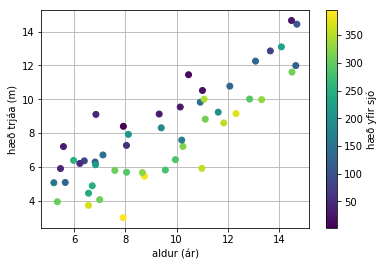

In [50]:
npr.seed(42)
aldur = 5 + npr.rand(50)*10
hys = npr.rand(50)*400
eps = npr.randn(50)
hæð = 0.5 + 1*aldur - 0.01*hys + eps;
plt.scatter(aldur, hæð, c=hys);
plt.xlabel('aldur (ár)')
plt.ylabel('hæð trjáa (m)')
plt.colorbar(label='hæð yfir sjó')
plt.grid()

Nú skal meta stika líkansins með því að beita "venjulegri aðferð minnstu kvaðrata", þ.e.a.s. með því að lágmarka kvaðratsummu frávika milli hæðar trjánna og spár líkansins. Með öðrum orðum skal  lágmarka fallið:

$$
S(a_0, a_1, a_2) = \sum_{i=1}^{50} (\text{hæð}_i - (a_0 + a_1 x_i + a_2 y_i))^2
$$

Til þess getum við notað Python-fallið `sm.OLS` (`statsmodels.api` er flutt inn sem `sm` að ofan). OLS stendur fyrir *ordinary least squares*. Maður byrjar á að setja aldur og hys inn í fylki X, t.d. með `X = np.c_[aldur, hys]`, svo þarf að bæta dálki af ásum við X og það má gera með `X = sm.add_constant(X)`, svo er búið til líkan: `model = sm.OLS(hæð, X)` og að lokum eru stikarnir fundnir með `result = model.fit()`. Til að skrifa út niðurstöðuna er sagt `result.summary()` og til að búa til vigur $(a_0, a_1, a_2)$ með stikunum má segja `a = result.param`. Gerið allt þetta.